       UserID    Kelamin  Usia  EstimasiGaji  Beli
0    15624510       Laki    19         19000     0
1    15810944       Laki    35         20000     0
2    15668575  Perempuan    26         43000     0
3    15603246  Perempuan    27         57000     0
4    15804002       Laki    19         76000     0
..        ...        ...   ...           ...   ...
395  15691863  Perempuan    46         41000     1
396  15706071       Laki    51         23000     1
397  15654296  Perempuan    50         20000     1
398  15755018       Laki    36         33000     0
399  15594041  Perempuan    49         36000     1

[400 rows x 5 columns]


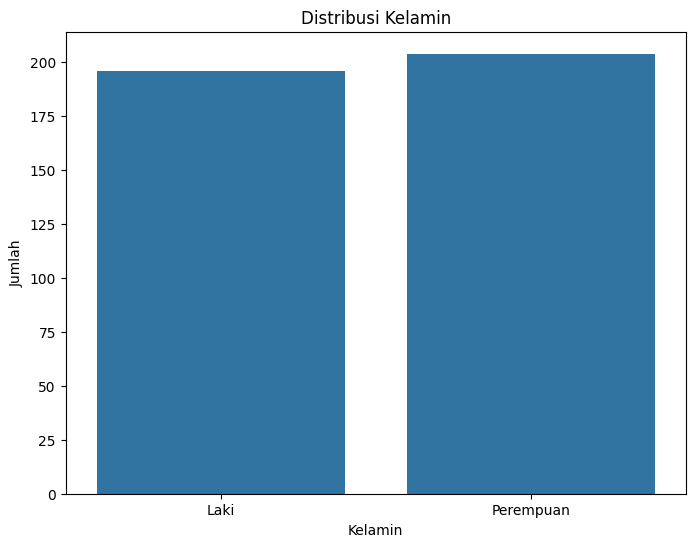

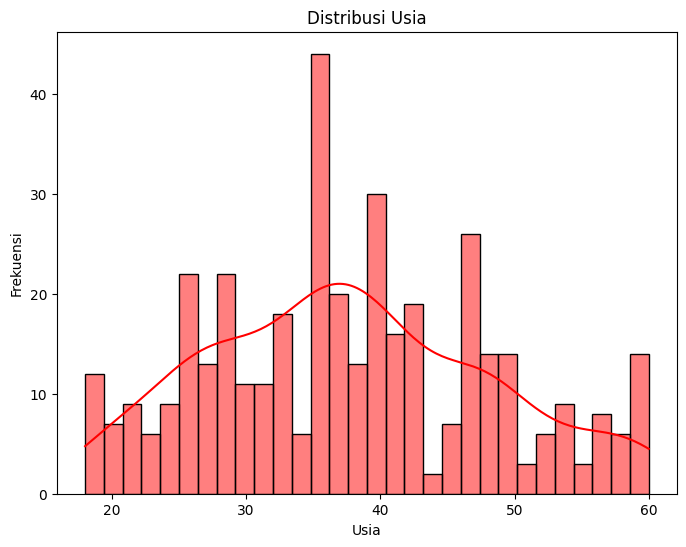

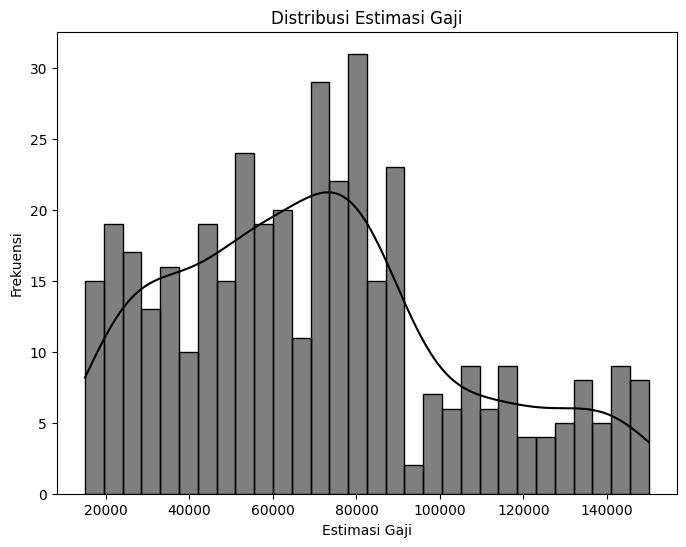

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        400 non-null    int64 
 1   Kelamin       400 non-null    object
 2   Usia          400 non-null    int64 
 3   EstimasiGaji  400 non-null    int64 
 4   Beli          400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
       UserID    Kelamin  Usia  EstimasiGaji  Beli  KelaminEncoding
0    15624510       Laki    19         19000     0              NaN
1    15810944       Laki    35         20000     0              NaN
2    15668575  Perempuan    26         43000     0              1.0
3    15603246  Perempuan    27         57000     0              1.0
4    15804002       Laki    19         76000     0              NaN
..        ...        ...   ...           ...   ...              ...
395  15691863  Perempuan    46         41000     1              1.0
39

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Tampilkan seluruh nilai dari dataset
iklan = pd.read_csv('iklan_sosmed.csv')
print(iklan)

# Lakukan EDA secukupnya
#             #1.  Menampilkan kelamin 
plt.figure(figsize=(8, 6))
sns.countplot(x='Kelamin', data=iklan)
plt.title('Distribusi Kelamin')
plt.xlabel('Kelamin')
plt.ylabel('Jumlah')
plt.show()

#             #2.  Menampilkan distribusi variabel Usia
plt.figure(figsize=(8, 6))
sns.histplot(iklan['Usia'], bins=30, kde=True, color='red')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()
#             #3.  Menampilkan gaji
plt.figure(figsize=(8, 6))
sns.histplot(iklan['EstimasiGaji'], bins=30, kde=True, color='black')
plt.title('Distribusi Estimasi Gaji')
plt.xlabel('Estimasi Gaji')
plt.ylabel('Frekuensi')
plt.show()

# # Cek apakah ada nilai yang hilang pada dataset dan isi nilai yang hilang pada 'EstimasiGaji' dengan median dari kolom tersebut.
print(iklan.info())

# Lakukan encoding pada kolom 'Kelamin'
kelamin = {'Laki-laki': 0, 'Perempuan': 1}
iklan['KelaminEncoding'] = iklan['Kelamin'].map(kelamin)
encoded = pd.get_dummies(iklan['Kelamin'], prefix='Kelamin')
data_encoded = pd.concat([iklan, encoded], axis=1)
print(iklan)

# Standarisasi kolom 'Usia' dan 'EstimasiGaji' menggunakan StandardScaler.
scaler = StandardScaler()
iklan[['Usia', 'EstimasiGaji']] = scaler.fit_transform(iklan[['Usia', 'EstimasiGaji']])
print(iklan[['Usia', 'EstimasiGaji']])

# Urutkan dataset berdasarkan 'EstimasiGaji' dari yang terendah ke tertinggi.
sorted_data = iklan.sort_values(by='EstimasiGaji')
print(sorted_data)

# Simpan dataset yang telah dibersihkan dan diproses ke file baru bernama 'Iklan_sosmed_clean.csv'
iklan.to_csv('Iklan_sosmed_clean.csv', index=False)